In [2]:
# install packages
import sys
%time  !{sys.executable} -m pip install numpy
%time  !{sys.executable} -m pip install pandas
%time  !{sys.executable} -m pip install matplotlib
%time  !{sys.executable} -m pip install sklearn
%time  !{sys.executable} -m pip install datetime
%time  !{sys.executable} -m pip install argparse

CPU times: user 37.5 ms, sys: 16.5 ms, total: 54 ms
Wall time: 2.48 s
CPU times: user 19.3 ms, sys: 8.94 ms, total: 28.2 ms
Wall time: 1.49 s
CPU times: user 18.7 ms, sys: 8.8 ms, total: 27.5 ms
Wall time: 1.41 s
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=f977b4cd9b9919327570b69d3e26ef72a3a26cd1a00554fb52f11de2e3ca9a18
  Stored in directory: /Users/skasralikar/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
CPU times: user 44.6 ms, sys: 16.9 ms, total: 61.5 ms
Wall time: 2.81 s
     |████████████████████████████████| 61kB 2.0MB/s eta 0:00:01
     |████████████████████████████████| 194kB 4.1MB/s eta 0:00:01
CPU times: user 48.9 ms, sys: 18.3 ms, total: 67.2 ms
Wall time: 2.58 s
CPU times: user 29.1 ms, sys: 11.7 ms, total: 40.8 ms
Wall time: 1.84 s


In [3]:
# method 1 to install 'torch'
%time  !{sys.executable} -m pip install torch

     |████████████████████████████████| 80.5MB 17.0MB/s eta 0:00:01     |████████████████████▊           | 52.1MB 3.5MB/s eta 0:00:09     |█████████████████████████▍      | 63.8MB 14.9MB/s eta 0:00:02
CPU times: user 1.07 s, sys: 389 ms, total: 1.45 s
Wall time: 19 s


In [5]:
# method 2 to install 'torch'
!pip3 install https://download.pytorch.org/whl/cpu/torch-1.0.1-cp37-cp37m-win_amd64.whl

ERROR: torch-1.0.1-cp37-cp37m-win_amd64.whl is not a supported wheel on this platform.


In [6]:
# Read database about the confirmed cases and try to filter out the area
import pandas as pd
import datetime
url="https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/latimes-place-totals.csv"
df = pd.read_csv(url,header=0)
df = df[df['county']=='Los Angeles'][['date','place','confirmed_cases']]

target = ['Alhambra', 'Arcadia', 'Beverly Hills', 'Boyle Heights', 'Carson', 'Diamond Bar', 'Encino', 'Gardena', 'Glendale', 'Glendora',
          'Granada Hills', 'Inglewood', 'La Mirada', 'Lancaster', 'Manhattan Beach', 'Melrose', 'Northridge', 'San Dimas', 'San Pedro',
          'Santa Monica', 'Sherman Oaks', 'Silver Lake', 'Tarzana', 'Torrance', 'Venice', 'West Adams', 'West Hills', 'West Hollywood',
          'West Vernon', 'Westchester', 'Altadena', 'Baldwin Hills', 'Brentwood', 'Culver City', 'Eagle Rock', 'Hollywood',
          'Hollywood Hills', 'Lynwood', 'Mar Vista', 'Monterey Park', 'North Hollywood', 'Reseda', 'Santa Clarita', 'Woodland Hills',
          'Sylmar', 'Walnut', 'Beverlywood', 'Burbank', 'Calabasas', 'Castaic', 'Covina', 'Crestview', 'East Los Angeles', 'Echo Park', 
          'Hancock Park', 'Hawthorne', 'Lawndale', 'Lomita', 'Palms', 'Playa Vista', 'South El Monte', 'Stevenson Ranch', 'Studio City',
          'Tujunga', 'University Park', 'Valley Glen', 'Van Nuys', 'Vermont Knolls', 'Westwood', 'Whittier', 'Century City', 'El Segundo',
          'Lake Balboa', 'Lakewood', 'Miracle Mile', 'Park La Brea', 'Redondo Beach', 'San Fernando', 'South Whittier', 'Winnetka', 
          'Del Rey', 'La Canada Flintridge', 'La Verne', 'Montebello', 'Sun Valley', 'Sunland', 'Vermont Vista', 'Vernon Central',
          'West Covina', 'Westlake', 'Bellflower', 'Canoga Park', 'East Hollywood', 'Los Feliz', 'Paramount', 'Rancho Palos Verdes', 
          'South Gate', 'Agoura Hills', 'Duarte', 'Exposition Park', 'Hyde Park', 'Lincoln Heights', 'Palmdale', 'South Park',
          'Wilshire Center', 'Canyon Country', 'Claremont', 'Downey', 'Harbor Gateway', 'Harvard Heights', 'Highland Park', 
          'La Puente', 'Norwalk', 'Pico Rivera', 'Porter Ranch', 'San Gabriel', 'Wholesale District', 'Willowbrook', 'Arleta',
          'Bell Gardens', 'Glassell Park', 'Panorama City', 'Pomona', 'Valinda', 'Watts', 'Azusa', 'Bell', 'Chatsworth', 
          'Hacienda Heights', 'Harbor City', 'Leimert Park', 'Maywood', 'Monrovia', 'North Hills', 'Pacoima', 'Avalon', 'Baldwin Park',
          'Bassett', 'Central', 'El Monte', 'El Sereno', 'Harvard Park', 'Lake Los Angeles', 'Rosemead', 'Rowland Heights', 'Temple City',
          'Acton', 'Cerritos', 'Cloverdale/Cochran', 'Compton', 'Downtown', 'Huntington Park', 'Koreatown', 'Mt. Washington', 'Pasadena', 
          'South Pasadena', 'Wilmington']

df = df[df['place'].isin(target)]

In [7]:
# Change Data Type 
result = df.copy()
result['place'].replace('Silver Lake','Silverlake',inplace = True)
result['date'] = pd.to_datetime(result['date'])

In [5]:
#  Add New Columns
result = result.sort_values(by=['place','date'])
result['new_confirmed_cases'] = result['confirmed_cases']
result['ave_new7_10after'] = result['confirmed_cases']
result['ave_new6_9after'] = result['confirmed_cases']
result['ave_new8_11after'] = result['confirmed_cases']
result.iloc[0,3] = None

# Calculate Daily New Cases
for i in range(1,len(result)):
    if result.iloc[i,1] != result.iloc[(i-1),1]:
        result.iloc[i,3] = None
    else:
        result.iloc[i,3] = max([0,int(result.iloc[i,2])-int(result.iloc[(i-1),2])])    
# Calculate Future Cases in AVG
for i in range(1,len(result)):    
    if i < (len(result)-11):
        if result.iloc[i,1] == result.iloc[(i+11),1]:
            result.iloc[i,4] = (result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3] + result.iloc[(i+10),3])/4.0
            result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3])/4.0
            result.iloc[i,6] = (result.iloc[(i+8),3] + result.iloc[(i+9),3] + result.iloc[(i+10),3] + result.iloc[(i+11),3])/4.0
        elif result.iloc[i,1] == result.iloc[(i+10),1]:
            result.iloc[i,4] = (result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3] + result.iloc[(i+10),3])/4.0
            result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3])/4.0
            result.iloc[i,6] = (result.iloc[(i+8),3] + result.iloc[(i+9),3] + result.iloc[(i+10),3])/3.0
        elif result.iloc[i,1] == result.iloc[(i+9),1]:
            result.iloc[i,4] = (result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3])/3.0
            result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3])/4.0
            result.iloc[i,6] = (result.iloc[(i+8),3] + result.iloc[(i+9),3])/2.0
        elif result.iloc[i,1] == result.iloc[(i+8),1]:
            result.iloc[i,4] = (result.iloc[(i+7),3] + result.iloc[(i+8),3])/2.0
            result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3] + result.iloc[(i+8),3])/3.0
            result.iloc[i,6] = result.iloc[(i+8),3]
        elif result.iloc[i,1] == result.iloc[(i+7),1]:
            result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3])/2.0
            result.iloc[i,6] = result.iloc[i,4] = result.iloc[(i+7),3]
        else:
            for j in range(8):
                if result.iloc[i,1] == result.iloc[(i+7-j),1]:
                    result.iloc[i,4] = result.iloc[i,5] = result.iloc[i,6] = result.iloc[(i+7-j),3]
                    break
    else:
        if i < (len(result)-10):
            result.iloc[i,4] = (result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3] + result.iloc[(i+10),3])/4.0
            result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3])/4.0
            result.iloc[i,6] = (result.iloc[(i+8),3] + result.iloc[(i+9),3] + result.iloc[(i+10),3])/3.0
        elif i < (len(result)-9):
            result.iloc[i,4] = (result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3])/3.0
            result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3])/4.0
            result.iloc[i,6] = (result.iloc[(i+8),3] + result.iloc[(i+9),3])/2.0
        elif i < (len(result)-8):
            result.iloc[i,4] = (result.iloc[(i+7),3] + result.iloc[(i+8),3])/2.0
            result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3] + result.iloc[(i+8),3])/3.0
            result.iloc[i,6] = result.iloc[(i+8),3]
        elif i < (len(result)-7):
            result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3])/2.0
            result.iloc[i,6] = result.iloc[i,4] = result.iloc[(i+7),3]
        else:          
            result.iloc[i,4] = result.iloc[i,5] = result.iloc[i,6] = result.iloc[-1,3]

result.dropna(inplace = True)            

In [7]:
# Read Mobility Data

url2= "https://covid19-static.cdn-apple.com/covid19-mobility-data/2013HotfixDev8/v3/en-us/applemobilitytrends-2020-07-25.csv"
apple_mobility = pd.read_csv(url2,header=0)

url3 = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=04188f017409e90a"
google_mobility = pd.read_csv(url3)

c:\users\hp\pycharmprojects\test1\venv\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
# Edit Mobility Data for Merging
apple_mobility = apple_mobility[apple_mobility['region']=='Los Angeles']
google_mobility = google_mobility[google_mobility['sub_region_2'] == 'Los Angeles County']

amobility= apple_mobility.copy()
amobility = amobility.set_index('transportation_type').transpose().iloc[5:]

amobility['date'] = pd.to_datetime(amobility.index)

gmobility = google_mobility[['date','retail_and_recreation_percent_change_from_baseline',
                       'grocery_and_pharmacy_percent_change_from_baseline',
                       'parks_percent_change_from_baseline',
                       'transit_stations_percent_change_from_baseline',
                       'workplaces_percent_change_from_baseline',
                       'residential_percent_change_from_baseline',]].copy()
gmobility['date'] = pd.to_datetime(google_mobility['date'])

In [9]:
# Read and Modify Econ Data
url4 = "https://raw.githubusercontent.com/skasralikar/Risk-Score-1-UMichZJU/master/econ_level.csv"
econ = pd.read_csv(url4, index_col = 0)
econ.columns = ['place','Density_Per_Sq_Mile','population','Income_level']

In [10]:
# Merge Mobility Data
final = result.merge(amobility,how = 'left',on = 'date')
final_result = final.merge(gmobility,how = 'left',on = 'date')
final_result.dropna(inplace = True)

# Merge Econ Data
final_results = final_result.merge(econ, how = 'left', on = 'place')

In [11]:
final_results['ZIP'] = final_results['place']
final_results['ZIP'].astype(str)
final_results['date'].astype(str)

LA_daily = final_results[['ZIP','date','confirmed_cases','new_confirmed_cases','population','Density_Per_Sq_Mile','Income_level','driving','transit',
                          'walking','retail_and_recreation_percent_change_from_baseline',
                          'grocery_and_pharmacy_percent_change_from_baseline',
                          'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline',
                          'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline',
                          'ave_new7_10after','ave_new6_9after','ave_new8_11after']]

LA_daily_predict = final_results[['ZIP','date','confirmed_cases','new_confirmed_cases','population','Density_Per_Sq_Mile','Income_level','driving',
                                  'transit','walking','retail_and_recreation_percent_change_from_baseline',
                                  'grocery_and_pharmacy_percent_change_from_baseline',
                                  'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline',
                                  'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline',
                                  'ave_new7_10after']]


In [12]:
print(LA_daily.head(10))
print(LA_daily_predict.head(10))

     ZIP       date  confirmed_cases  new_confirmed_cases  population  \
0  Acton 2020-04-03                1                  0.0        6522   
1  Acton 2020-04-04                1                  0.0        6522   
2  Acton 2020-04-05                1                  0.0        6522   
3  Acton 2020-04-06                1                  0.0        6522   
4  Acton 2020-04-07                1                  0.0        6522   
5  Acton 2020-04-08                1                  0.0        6522   
6  Acton 2020-04-09                1                  0.0        6522   
7  Acton 2020-04-10                5                  4.0        6522   
8  Acton 2020-04-11                5                  0.0        6522   
9  Acton 2020-04-12                5                  0.0        6522   

   Density_Per_Sq_Mile  Income_level driving transit walking  \
0                  166             2   52.04    26.3    52.6   
1                  166             2   44.77   22.14   48.28   
2   

In [13]:
# parameter_daily.py
"""    super parameter     """
day_input = 6                      # how many days' feature we use to predict
timelagging = 6                     # the length of latent window of Social Distancing data & Mobility data
average_num = 4                     # how many days does the average cases get from
### change the feature numbers  ###
feature_num = 14+2*(day_input-1)    # the number of feature that one input contains
### -------------------------  ###

In [14]:
# dataset_daily.py
import torch
import pandas as pd
from sklearn import model_selection
from torch.utils.data import Dataset, DataLoader
#from parameter_daily import day_input, average_num, feature_num, timelagging

class Mydataset(Dataset):
    def __init__(self, input, output):
        super(Mydataset, self).__init__()
        self.input = input
        self.lable = output

    def __getitem__(self, index):
        return self.input[index], self.lable[index]

    def __len__(self):
        return len(self.input)


def dataset_generate_daily():
    """    read data in and clean!     """

    ### change the input datset name ###
#     filename = "LA_daily.csv"
    ### ---------------------------- ###
    zipcode_daily = LA_daily
#     pd.read_csv(filename, encoding="ISO-8859-1", dtype={'ZIP': str, 'date': str})
    zip = zipcode_daily['ZIP']  # 'ZIP' column
    date = zipcode_daily['date']  # we have to preserve the date
    del zipcode_daily['ZIP']  # delete the non-numeric columns
    del zipcode_daily['date']
    zipcode_daily = pd.DataFrame(zipcode_daily, dtype=float)  # change the type from 'int' to 'float'
    zipcode_daily['ZIP'] = zip  # add the 'ZIP' column again

    # key: 'zip code', value: feature that belong to the 'zip code'
    data_dict = {}
    for i, zipcode in enumerate(zipcode_daily[:]['ZIP']):
        if zipcode not in data_dict:
            data_dict[zipcode] = []
        feature = []
        for f in zipcode_daily.iloc[i]:
            feature.append(f)
        data_dict[zipcode].append(feature)

    data_x = []  # input
    data_y = []  # lable
    for key, values in data_dict.items():
        l = len(values)
        input_num = l - timelagging - average_num  # determine how many input here
        feature = []
        for i in range(input_num):  # one input point contains 6 days's data, that is day1~day6
            first = True
            for j in range(day_input):
                if first:  # one input point contains all the feature of day1
                    for k in values[i][:-4]:
                        feature.append(k)
                    first = False
                else:  # for day2~day6, one input point only contains confirmed_cases & new_confirmed_cases
                    feature.append(values[i + j][0])
                    feature.append(values[i + j][1])
            data_y.append(values[i][-4])  # output: average cases, that is ave_new7_10after
            tmp = []
            tmp.append(feature)
            data_x.append(tmp)  # size: [1, feature_num]
            feature = []
    # split data to train and test, and split test to validation and test in the following.
    train_x, test_x, train_y, test_y = model_selection.train_test_split(data_x, data_y, test_size=0.3,
                                                                        random_state=1)

    train_x_ls = []  # Change the format for later processing
    for j in train_x:
        for i in j:
            train_x_ls.append(i)
    train_x_df = pd.DataFrame(train_x_ls)
    train_y_df = pd.DataFrame(train_y)
    train_x_mean = train_x_df.mean()  # train_x dataset mean
    train_x_std = train_x_df.std()  # train_x dataset std
    train_y_mean = train_y_df.mean()  # train_y dataset mean
    train_y_std = train_y_df.std()  # train_y dataset std

    for i in range(len(train_x)):       # using train_x mean and train_x std to normalize
        for j in range(len(train_x[i])):
            for k in range(len(train_x[i][j])):
                train_x[i][j][k] = (train_x[i][j][k] - train_x_mean[k]) / train_x_std[k]

    for i in range(len(train_y)):       # using train_y mean and train_y std to normalize
        train_y[i] = (train_y[i] - train_y_mean) / train_y_std

    for i in range(len(test_x)):        # using train_x mean and train_x std to normalize
        for j in range(len(test_x[i])):
            for k in range(len(test_x[i][j])):
                test_x[i][j][k] = (test_x[i][j][k] - train_x_mean[k]) / train_x_std[k]

    for i in range(len(test_y)):        # using train_y mean and train_y std to normalize
        test_y[i] = (test_y[i] - train_y_mean) / train_y_std

    # split test to validation and test
    validation_x, test_x, validation_y, test_y = model_selection.train_test_split(test_x, test_y, test_size=0.5,
                                                                                  random_state=1)
    train_x = torch.tensor(train_x)
    train_y = torch.tensor(train_y).reshape(-1, 1)
    validation_x = torch.tensor(validation_x)
    validation_y = torch.tensor(validation_y).reshape(-1, 1)
    test_x = torch.tensor(test_x)
    test_y = torch.tensor(test_y).reshape(-1, 1)

    # define dataset
    train_data = Mydataset(train_x, train_y)
    trainloader = DataLoader(train_data, batch_size=256, shuffle=True)

    return trainloader, train_x, train_y, validation_x, validation_y, \
           test_x, test_y, train_x_mean, train_x_std, train_y_mean, train_y_std

In [15]:
# function.py
import torch


# scale the output value back to its original size and cal the loss
def loss_cal(predict, lable, train_mean, train_std):
    x = predict[:]
    y = lable[:]
    for i in range(len(predict)):
        x[i][0] = x[i][0] * torch.tensor(train_std) + torch.tensor(train_mean)
        y[i][0] = y[i][0] * torch.tensor(train_std) + torch.tensor(train_mean)
    loss_fun = torch.nn.MSELoss()
    loss = loss_fun(x, y)
    return loss, x, y


# change the learning rate
def adjust_learning_rate(optimizer, learning_r=None):
    i = 0
    for param_group in optimizer.param_groups:
        param_group['lr'] = learning_r
        if i == 0:
            print("optimizer lr : {}".format(param_group['lr']))
            i += 1


"""     define LSTM model   """
class Net(torch.nn.Module):
    def __init__(self, feature_num):
        super(Net, self).__init__()
        # if batch_first=True, then input shape = (batch, seq, shape)
        self.lstm = torch.nn.LSTM(input_size=feature_num, hidden_size=64, num_layers=1, batch_first=True)
        self.linear = torch.nn.Linear(64 * 1, 32)
        self.linear1 = torch.nn.Linear(32, 1)

    def forward(self, x):
        # print(x.shape)
        x, _ = self.lstm(x)
        x = x.reshape(-1, 64 * 1)
        x = self.linear(x)
        x = self.linear1(x)
        return x

In [16]:
# train_daily.py
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from dataset_daily import dataset_generate_daily
#from function import loss_cal, adjust_learning_rate, Net
#from parameter_daily import feature_num


def train_daily():

    trainloader, train_x, train_y, validation_x, validation_y, test_x, test_y, \
    train_x_mean, train_x_std, train_y_mean, train_y_std = dataset_generate_daily()

    """         training start!         """
    # determine optimizer, loss_function and checkpoint path
    model = Net(feature_num)
    learning_r = 0.0002
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_r)
    loss_fun = torch.nn.MSELoss()
    ### change the path name ###
    path = 'checkpoint_0727.tar'
    ### ------------------- ###

    """ if you want train your model from a pre-trained model, uncomment the following code. """
    # checkpoint = torch.load(path)
    # model.load_state_dict(checkpoint['net'])
    # optimizer.load_state_dict(checkpoint['optimizer'])
    # validation_loss = checkpoint['best_validation_loss']
    # learning_r = 6.400000000000004e-8

    model.train()
    # val_loss_info = [validation_loss]
    val_loss_info = []      # preserve every epoch's train loss
    train_loss_info = []    # preserve every epoch's validation loss
    not_improve = 0
    for epoch in range(1500):
        for i, values in enumerate(trainloader):
            input, lable = values
            output = model(input)
            loss = loss_fun(output, lable)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        if epoch % 10 == 0 and epoch > 0:
            train_loss = loss_fun(model(train_x),train_y).item()
            vali_loss = loss_fun(model(validation_x), validation_y).item()
            if len(val_loss_info) == 0 or vali_loss < min(val_loss_info):  # save the best model
                not_improve = 0
                state = {'net': model.state_dict(), 'optimizer': optimizer.state_dict(),'best_validation_loss': vali_loss}
                torch.save(state, path)
                print("Saved the model.")
            else:                           # if validation loss didn't decrease, reload the best model in next epoch.
                checkpoint = torch.load(path)
                model.load_state_dict(checkpoint['net'])
                optimizer.load_state_dict(checkpoint['optimizer'])
                not_improve += 1
                print("not_improve : {}".format(not_improve))
            if (not_improve+1) % 8 == 0:    # when validation loss doesn't decrease for 7 epochs, reduce the learning rate.
                learning_r *= 0.2
                adjust_learning_rate(optimizer, learning_r)
            if (not_improve+1) % 25 == 0:   # early stopping
                print("Training End......")
                break

            print("epoch:{}, train_loss:{}, vali_loss: {}".format(epoch, train_loss, vali_loss))
            train_loss_info.append(train_loss)
            val_loss_info.append(vali_loss)

    return train_loss_info, val_loss_info



In [17]:
# test_daily.py
import pandas as pd
import torch
import matplotlib.pyplot as plt
#from function import loss_cal, adjust_learning_rate, Net
#from parameter_daily import feature_num
import numpy as np

def test_daily(path, test_x, test_y, train_mean, train_std):
    """     test start!     """
    # using the test dataset to test model
    model = Net(feature_num)
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint['net'])
    model.eval()
    predict = model(test_x)
    real = test_y.clone()

    loss_fun = torch.nn.MSELoss()
    # two losses, one is normalized scale, another is original scale
    loss = loss_fun(predict, real)
    loss_original_scale, pre, rea = loss_cal(predict, real, train_mean, train_std)
    pre = np.array(pre.data)
    rea = np.array(rea.data)
    print("Test loss: " + str(loss))
    print("Test loss in original scale: " + str(loss_original_scale))

    # true output and predicted output
    plt.figure(2)
    plt.plot(list(rea), label="real")
    plt.plot(list(pre), label="pred")
    plt.legend(loc='best')
    plt.show()

    # true output and predicted output
    plt.figure(3)
    min_val = min(rea)
    max_val = max(rea)
    plt.scatter(rea,pre)
    plt.plot([min_val,max_val],[min_val,max_val],color = 'red')
    plt.show()

In [18]:
# main.py
"""

In this project, We created a LSTM model to predict covid-19 daily new_cases and weekly new cases in Los Angeles.

If you find anything wrong with the code, please feel free to contact us.

@University: Umich & ZJU
@author: Wenxue Li, Zixian Ma, Xinyu Li
@email: liwenxue@zju.edu.cn, 3170103467@zju.edu.cn

"""
"""
from dataset_daily import dataset_generate_daily
from dataset_weekly import dataset_generate
from train_daily import train_daily
from train_weekly import train_weekly
from test_daily import test_daily
from test_weekly import test_weekly
"""
import matplotlib.pyplot as plt
import argparse

parser = argparse.ArgumentParser(description='COVID-LSTM')
parser.add_argument('--mode', default='train', type=str, help='choose train or test')
parser.add_argument('--type', default='daily', type=str, help='daily or weekly')

args = parser.parse_args(args=[]) ###

Saved the model.
epoch:10, train_loss:0.23581671714782715, vali_loss: 0.26640358567237854
Saved the model.
epoch:20, train_loss:0.2202320396900177, vali_loss: 0.25467345118522644
Saved the model.
epoch:30, train_loss:0.2083442360162735, vali_loss: 0.24657389521598816
Saved the model.
epoch:40, train_loss:0.1992214173078537, vali_loss: 0.2402394562959671
Saved the model.
epoch:50, train_loss:0.19169357419013977, vali_loss: 0.23641279339790344
Saved the model.
epoch:60, train_loss:0.1858120709657669, vali_loss: 0.23278628289699554
Saved the model.
epoch:70, train_loss:0.18032899498939514, vali_loss: 0.23030145466327667
Saved the model.
epoch:80, train_loss:0.17577402293682098, vali_loss: 0.2279222309589386
Saved the model.
epoch:90, train_loss:0.17148926854133606, vali_loss: 0.22641438245773315
Saved the model.
epoch:100, train_loss:0.16759809851646423, vali_loss: 0.224184051156044
Saved the model.
epoch:110, train_loss:0.1638946384191513, vali_loss: 0.22371232509613037
not_improve : 1
e

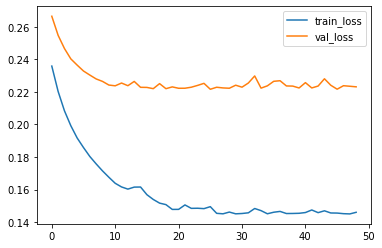

In [19]:
if args.mode == 'train':
    if args.type == 'daily':
        train_loss_info, val_loss_info = train_daily()
        # training loss trend and validation loss trend
        plt.figure(1)
        plt.plot(train_loss_info, label='train_loss')
        plt.plot(val_loss_info, label='val_loss')
        plt.legend(loc='best')
        plt.show()
    if args.type == 'weekly':
        train_loss_info, val_loss_info = train_weekly()
        # training loss trend and validation loss trend
        plt.figure(1)
        plt.plot(train_loss_info, label='train_loss')
        plt.plot(val_loss_info, label='val_loss')
        plt.legend(loc='best')
        plt.show()

In [20]:
if args.mode == 'test':
    if args.type == 'daily':
        trainloader, train_x, train_y, validation_x, validation_y, \
        test_x, test_y, train_x_mean, train_x_std, train_y_mean, train_y_std = dataset_generate_daily()
        # path = 'checkpoint_1.tar'
        path = 'checkpoint_daily.tar'
        test_daily(path, test_x, test_y, train_y_mean, train_y_std)
    if args.type == 'weekly':
        # path = 'checkpoint_2.tar'
        path = 'checkpoint_weekly_sequential.tar'
        trainloader, train_x, train_y, validation_x, validation_y, \
        test_x, test_y, train_x_mean, train_x_std, train_y_mean, train_y_std = dataset_generate()
        test_weekly(path, test_x, test_y, train_y_mean, train_y_std)

In [21]:
# daily_predict_4_day_avg.py
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

day_input = 6
timelagging = 6
average_num = 4
### change the numbers of feature ###
feature_num = 14+2*(day_input-1)
### ------------------------###

"""     read in data and process, this part is very similar to lstm_1.py    """
### change the input dataset name ###
# filename = "LA_daily_predict.csv"
### --------------------------- ###
zipcode_daily = LA_daily_predict
# pd.read_csv(filename, encoding="ISO-8859-1", dtype={'ZIP': str, 'date': str})
zip = zipcode_daily['ZIP']
date = zipcode_daily['date']  # we have to preserve the date
del zipcode_daily['ZIP']
del zipcode_daily['date']
zipcode_daily = pd.DataFrame(zipcode_daily, dtype=float)  # change the type from 'int' to 'float'
zipcode_daily['ZIP'] = zip
zipcode_daily['date'] = date  # add date back

data_dict = {}  # key: 'zip', value: feature that belong to the key
for i, zipcode in enumerate(zipcode_daily[:]['ZIP']):
    if zipcode not in data_dict:
        data_dict[zipcode] = []
    feature = []
    for f in zipcode_daily.iloc[i]:
        feature.append(f)
    data_dict[zipcode].append(feature)

zipcode = []  # save 'zip code' correlating to input point
date = []     # save 'date' correlating to input point

data_x = []  # input
for key, values in data_dict.items():
    l = len(values)
    input_num = l - timelagging - average_num
    feature = []
    input_num=input_num+5
    for i in range(input_num):
        first = True
        for j in range(day_input):
            if first:
                zipcode.append(values[i][-2])   # save 'zip code' correlating to ont input point
                date.append(values[i][-1])      # save 'date' correlating to ont input point
                # because we add 'date' back, the last feature is values[i][:-5] not values[i][:-4]
                for k in values[i][:-3]:
                    feature.append(k)
                first = False
            else:
                feature.append(values[i + j][0])
                feature.append(values[i + j][1])
        tmp = []
        tmp.append(feature)
        data_x.append(tmp)  # one input point
        feature = []

data_x_ls = []
for j in data_x:
    for i in j:
        data_x_ls.append(i)
data_x_df = pd.DataFrame(data_x_ls)
data_x_mean = data_x_df.mean()  # train dataset mean
data_x_std = data_x_df.std()    # train dataset std

for i in range(len(data_x)):    # using train_x mean and train_x std to normalize
    for j in range(len(data_x[i])):
        for k in range(len(data_x[i][j])):
            data_x[i][j][k] = (data_x[i][j][k] - data_x_mean[k]) / data_x_std[k]

data_x = torch.tensor(data_x)


# scale the output value back to its original size and cal the loss
def upscale(predict):
    x = predict[:]
    for i in range(len(predict)):
        x[i][0] = x[i][0] * torch.tensor(data_x_std[1]) + torch.tensor(data_x_mean[1])
    return x

In [22]:
"""     define LSTM model   """
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # if batch_first=True, then input shape = (batch, seq, shape)
        self.lstm = torch.nn.LSTM(input_size=feature_num, hidden_size=64, num_layers=1, batch_first=True)
        self.linear = torch.nn.Linear(64 * 1, 32)
        self.linear1 = torch.nn.Linear(32, 1)

    def forward(self, x):
        # print(x.shape)
        x, _ = self.lstm(x)
        x = x.reshape(-1, 64 * 1)
        x = self.linear(x)
        x = self.linear1(x)
        return x


model = Net()
### change the path name ###
path = 'checkpoint_0727.tar'
### -------------------- ###
# load from file
checkpoint = torch.load(path)
model.load_state_dict(checkpoint['net'])
model.eval()
predict = np.array(model(data_x).data)  # output
predict_upscale = upscale(predict)      # original scale output

In [23]:
import datetime
###
date_list = []
for i in range(1,31):
    date_list.append('2020-04-'+str(i))
for i in range(1,32):
    date_list.append('2020-05-'+str(i))
for i in range(1,31):
    date_list.append('2020-06-'+str(i))
for i in range(1,32):
    date_list.append('2020-07-'+str(i))
for i in range(1,32):
    date_list.append('2020-08-'+str(i))
for i in range(1,31):
    date_list.append('2020-09-'+str(i))
for i in range(1,32):
    date_list.append('2020-10-'+str(i))
for i in range(1,31):
    date_list.append('2020-11-'+str(i))
for i in range(1,32):
    date_list.append('2020-12-'+str(i))


date_list_new = []
"""
for date_ in date:
    date_start = date_list[date_list.index(date_)+6]
    date_end = date_list[date_list.index(date_)+9]
    date_list_new.append(date_start+' - ' + date_end)
"""
for date_ in date:
    date_start = (date_+datetime.timedelta(days=6)).strftime("%Y-%m-%d")
    date_end = (date_+datetime.timedelta(days=9)).strftime("%Y-%m-%d")
    date_list_new.append(date_start+' - ' + date_end)

In [24]:
out = pd.DataFrame()                            # generate table
out['ZIP'] = zipcode                            # zip code column
out['date_start - date_end'] = date_list_new    # date column
out['Predicted new cases'] = predict_upscale     # predicted new cases columns
out['risk_score_level']=None
###
pop = pd.read_csv('LApopulation.csv', index_col = False)  # population data
###
for i in range(out.shape[0]):
    for j in range(pop.shape[0]):
        if (out.at[i,'ZIP'] == pop.at[j,'ZIP']):
            out.at[i,'cases/population'] = 10000 * out.at[i,'Predicted new cases'] / pop.at[j,'population']

print(out.head(5))

     ZIP    date_start - date_end  Predicted new cases risk_score_level  \
0  Acton  2020-04-09 - 2020-04-12            -0.961864             None   
1  Acton  2020-04-10 - 2020-04-13            -1.684089             None   
2  Acton  2020-04-11 - 2020-04-14            -0.810418             None   
3  Acton  2020-04-12 - 2020-04-15            -1.404660             None   
4  Acton  2020-04-13 - 2020-04-16            -1.500849             None   

   cases/population  
0         -1.474799  
1         -2.582167  
2         -1.242591  
3         -2.153725  
4         -2.301210  


In [25]:
# defind the risk score level
for i in range(len(out)):
    if out['cases/population'][i]<=2:
        out.loc[i,'risk_score_level']=1
    elif out['cases/population'][i]<=10:
        out.loc[i,'risk_score_level']=2
    elif out['cases/population'][i]<=20:
        out.loc[i,'risk_score_level']=3
    else:
        out.loc[i,'risk_score_level']=4
print(out.head(5))

     ZIP    date_start - date_end  Predicted new cases  risk_score_level  \
0  Acton  2020-04-09 - 2020-04-12            -0.961864                 1   
1  Acton  2020-04-10 - 2020-04-13            -1.684089                 1   
2  Acton  2020-04-11 - 2020-04-14            -0.810418                 1   
3  Acton  2020-04-12 - 2020-04-15            -1.404660                 1   
4  Acton  2020-04-13 - 2020-04-16            -1.500849                 1   

   cases/population  
0         -1.474799  
1         -2.582167  
2         -1.242591  
3         -2.153725  
4         -2.301210  


In [26]:
### change the output dataset name ###
out.to_csv('LA_daily_out.csv')
### ----------------------------   ###